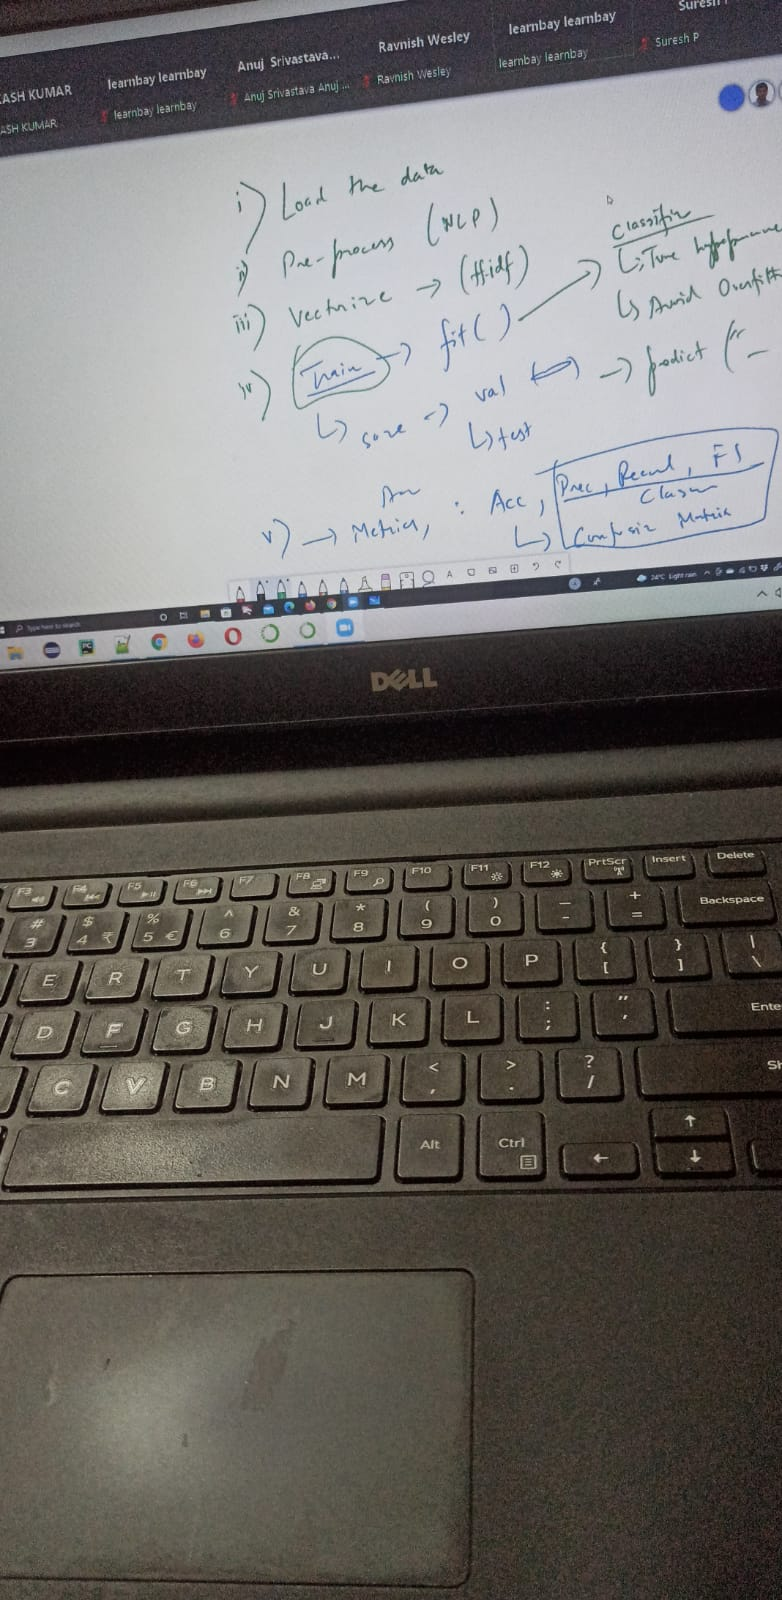

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Setting color for plot text (title and lable)
plt.rcParams.update({'text.color': "#24477f",### Mck deep blue
                     'axes.labelcolor': "#0892d0"}) ## Mck electric blue

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/testtxt/val.txt
/kaggle/input/testtxt/test.txt
/kaggle/input/testtxt/train.txt


In [4]:
df= pd.read_csv('../input/testtxt/train.txt',delimiter=';', names=['text', 'emotion'])
test = pd.read_csv('../input/testtxt/test.txt',delimiter=';', names=['text', 'emotion'])
val = pd.read_csv('../input/testtxt/val.txt',delimiter=';', names=['text', 'emotion'])
print('Test DataFrame')
display(test)
print('Val DataFrame')
display(val)
print('Training dataframe')
df

Test DataFrame


,text,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


Val DataFrame


,text,emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


Training dataframe


,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [5]:
### Quick check for missing values
display(df.isna().sum())
display(test.isnull().sum())
display(val.isna().sum())

text       0
emotion    0
dtype: int64

text       0
emotion    0
dtype: int64

text       0
emotion    0
dtype: int64

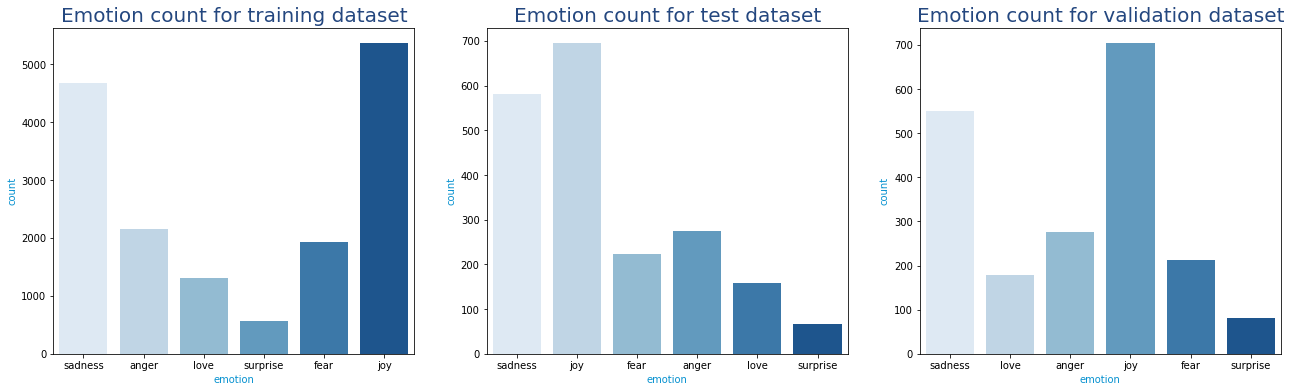

In [6]:
plt.figure(figsize=(22,6))
plt.subplot(1,3,1)
sns.countplot(df['emotion'], palette='Blues') ### Old format
plt.title('Emotion count for training dataset', fontsize=20)
plt.subplot(1,3,2)
sns.countplot(x='emotion',data=test, palette='Blues') ### New Method
plt.title('Emotion count for test dataset', fontsize=20)
plt.subplot(1,3,3)
sns.countplot(val['emotion'], palette='Blues')
plt.title('Emotion count for validation dataset', fontsize=20)
plt.show();

# Wordcloud with respect to emotions to get better insight of data

In [7]:
!pip install wordcloud

In [8]:
from wordcloud import WordCloud,STOPWORDS
stopwords = STOPWORDS

In [9]:
wc= WordCloud(background_color='white',stopwords=stopwords, height=1080, width =1080)

In [10]:
wc1= df[df['emotion']=='sadness'].to_string(index=False)
wc2= df[df['emotion']=='anger'].to_string(index=False)
wc3= df[df['emotion']=='love'].to_string(index=False)

wc4= df[df['emotion']=='surprise'].to_string(index=False)
wc5= df[df['emotion']=='fear'].to_string(index=False)
wc6= df[df['emotion']=='joy'].to_string(index=False)


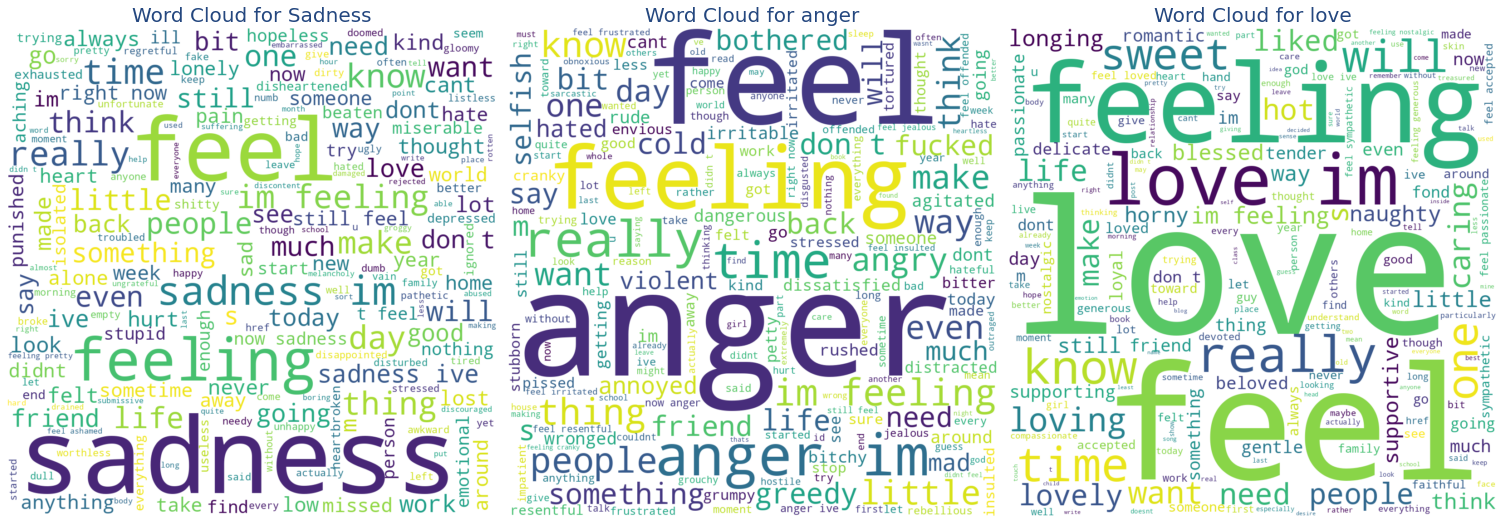

In [11]:
plt.figure(figsize=(21,14))
plt.subplot(1,3,1)
wc.generate(wc1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Sadness", fontsize=20)
wc.to_file('body1.png')

plt.subplot(1,3,2)
wc.generate(wc2)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for anger", fontsize=20)
wc.to_file('body2.png')

plt.subplot(1,3,3)
wc.generate(wc3)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for love", fontsize=20)
wc.to_file('body3.png')

plt.tight_layout()

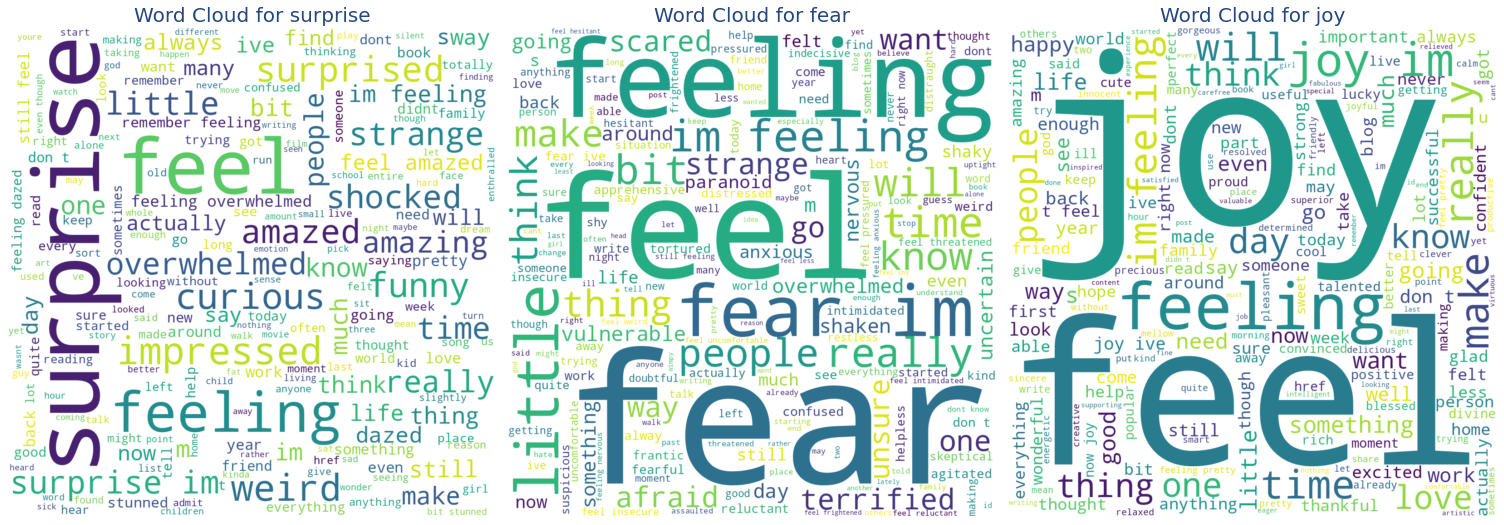

In [12]:
plt.figure(figsize=(21,14))
plt.subplot(1,3,1)
wc.generate(wc4)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for surprise", fontsize=20)
wc.to_file('body1.png')

plt.subplot(1,3,2)
wc.generate(wc5)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for fear", fontsize=20)
wc.to_file('body2.png')

plt.subplot(1,3,3)
wc.generate(wc6)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for joy", fontsize=20)
wc.to_file('body3.png')

plt.tight_layout()

# Sentiment analysis with `textblob`

In [13]:
from textblob import TextBlob

In [14]:
### define a function to get polarity

def get_polarity(aalu):
    blob = TextBlob(aalu)
    polarity=blob.sentiment.polarity
    return polarity

In [15]:
### define a function to extract sentiments 
def get_sentiments(aalu):
    blob = TextBlob(aalu)
    sentiment=blob.sentiment.polarity
    if sentiment >0:
        result='Positive'
    elif sentiment<0:
        result='Negative'
    else:
        result = 'Neutral'
    return result

In [16]:
print("For sentence 'i miss cake' we got following result ---->",get_sentiments('i miss cake'))
print("For sentence 'i am sad cake' we got following result ---->",get_sentiments('i am sad cake'))
print("For sentence 'My Name is Lovely Bald' we got following result ---->",get_sentiments('My Name is Lovely Bald'))
print("For sentence 'I am happy singh but I going through depression' we got following result ---->",
      get_sentiments('I am happy singh but I going through depression'))

For sentence 'i miss cake' we got following result ----> Neutral
For sentence 'i am sad cake' we got following result ----> Negative
For sentence 'My Name is Lovely Bald' we got following result ----> Positive
For sentence 'I am happy singh but I going through depression' we got following result ----> Positive


Text blob can't be trusted with complex sentences but in gen this gives us a broad idea about dataframe  
**Hence lets procceed**

In [17]:
df['sentiment']= df['text'].apply(get_sentiments)

In [18]:
df['polarity']= df['text'].apply(get_polarity)

In [19]:
df

,text,emotion,sentiment,polarity
0,i didnt feel humiliated,sadness,Neutral,0.000000
1,i can go from feeling so hopeless to so damned...,sadness,Neutral,0.000000
2,im grabbing a minute to post i feel greedy wrong,anger,Negative,-0.500000
3,i am ever feeling nostalgic about the fireplac...,love,Negative,-0.500000
4,i am feeling grouchy,anger,Neutral,0.000000
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,Neutral,0.000000
15996,i am now turning and i feel pathetic that i am...,sadness,Negative,-1.000000
15997,i feel strong and good overall,joy,Positive,0.377778
15998,i feel like this was such a rude comment and i...,anger,Positive,0.066667


In [20]:
df[['emotion', 'polarity']]

,emotion,polarity
0,sadness,0.000000
1,sadness,0.000000
2,anger,-0.500000
3,love,-0.500000
4,anger,0.000000
...,...,...
15995,sadness,0.000000
15996,sadness,-1.000000
15997,joy,0.377778
15998,anger,0.066667


### Lets compare Emotions with `TextBlob` result

In [21]:
##### Using Groupby
df.groupby(['emotion','sentiment']).size()

emotion   sentiment
anger     Negative     1047
          Neutral       545
          Positive      567
fear      Negative      871
          Neutral       452
          Positive      614
joy       Negative      589
          Neutral       776
          Positive     3997
love      Negative      244
          Neutral       179
          Positive      881
sadness   Negative     2205
          Neutral      1165
          Positive     1296
surprise  Negative      233
          Neutral        60
          Positive      279
dtype: int64

In [22]:
df.emotion.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64

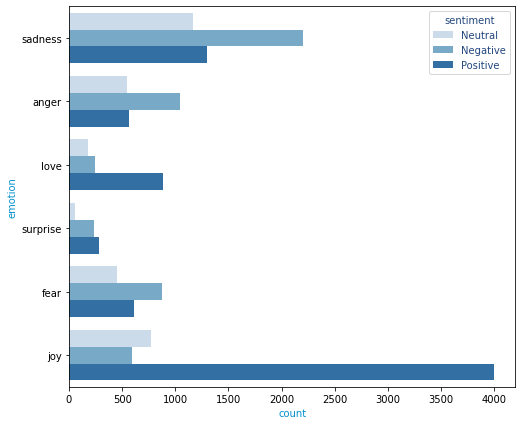

In [23]:
plt.figure(figsize=(8,7))
sns.countplot(data=df, y='emotion', hue='sentiment', palette= 'Blues');

# Text Cleaning
### Remove Noise
    - Stopwords
    - Special Characters
    - Punctuations
    - emojis

In [24]:
!pip install neattext

     |████████████████████████████████| 114 kB 4.5 MB/s            


In [25]:
import neattext.functions as nfx

In [26]:
### run this cell to check all possible operations using neattext
#dir(nfx)

In [27]:
type(stopwords)

set

In [28]:
### Text Cleaning

df['clean_text'] = df['text'].apply(nfx.remove_stopwords)           ## Lets Remove Stopwords from df.text
df['clean_text'] = df['clean_text'].apply(nfx.remove_userhandles)   ## Lets Remove Userhandles from df.clean_text
df['clean_text'] = df['clean_text'].apply(nfx.remove_punctuations)  ## Lets Remove Punctuations from df.clean_text

In [29]:
df[['text', 'clean_text']]

,text,clean_text
0,i didnt feel humiliated,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,feeling hopeless damned hopeful cares awake
2,im grabbing a minute to post i feel greedy wrong,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,feeling nostalgic fireplace know property
4,i am feeling grouchy,feeling grouchy
...,...,...
15995,i just had a very brief time in the beanbag an...,brief time beanbag said anna feel like beaten
15996,i am now turning and i feel pathetic that i am...,turning feel pathetic waiting tables subbing t...
15997,i feel strong and good overall,feel strong good overall
15998,i feel like this was such a rude comment and i...,feel like rude comment im glad


### `Note` Once model is generated, add feeling in stopword and remove it, to see it's effect on model

In [30]:
from collections import Counter

In [31]:
#### Keyword extraction
# Extracting most common words per emotions 

def extract_keywords(text,num=50):  ### num (50) most common keywords
    tokens= [tok for tok in text.split()]
    most_common_tokens= Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [32]:
### list of emotions
emotion_list = df.emotion.unique().tolist()  #### .unique() stores unique values as array thus converted it to list
type(emotion_list)
emotion_list

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

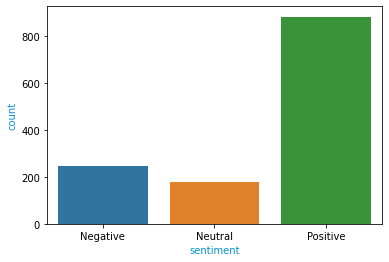

In [33]:
sns.countplot(x='sentiment', data=df[df['emotion']=='love']);

In [34]:
#### Will only show clean_text where emotion ==love
df[df['emotion']=='love']['clean_text'].head()

3             feeling nostalgic fireplace know property
9                                         feel romantic
47                   let sad feeling want accepted home
61    ate feel gentle tingle feeling healing taking ...
68    suppose truth needs shared havent feeling fait...
Name: clean_text, dtype: object

In [35]:
love_list = df[df['emotion']=='love']['clean_text'].tolist()

In [36]:
##### now lets combine all sentences from emotion == love into a doc #####

# love document
love_doc= ' '.join(love_list)

### uncomment this to read the sentence ( as it was taking large space in notebook thus I commented it)
# love_doc

In [37]:
### Extracting Keywords using function ###
love_keywords = extract_keywords(love_doc)

In [38]:
#### Uncomment to check the output
#love_keywords
type(love_keywords)

dict

In [39]:
###### Similarly lets do for rest of emotions too ######

## ~~~~~ Creating list for each emotions ~~~~~~~
sad_list = df[df['emotion']=='Sadness']['clean_text'].tolist()
anger_list = df[df['emotion']=='anger']['clean_text'].tolist()
surprise_list = df[df['emotion']=='surprise']['clean_text'].tolist()
fear_list = df[df['emotion']=='fear']['clean_text'].tolist()
joy_list = df[df['emotion']=='joy']['clean_text'].tolist()

## ~~~~~~~ Creating doc for each emotions ~~~~~~~
sad_doc      = ' '.join(sad_list)
anger_doc    = ' '.join(anger_list)
surprise_doc = ' '.join(surprise_list)
fear_doc     = ' '.join(fear_list)
joy_doc      = ' '.join(joy_list)

## ~~~~~~ Extracting Keywords using function ~~~~~
sad_keywords      = extract_keywords(sad_doc)
anger_keywords    = extract_keywords(anger_doc)
surprise_keywords = extract_keywords(surprise_doc)
fear_keywords     = extract_keywords(fear_doc)
joy_keywords      = extract_keywords(joy_doc)

# Machine Learning 
    - Naive Bayes
    - Logistic Regression
    - KNN
    - DecisionTree

In [40]:
## Loding ML package
from sklearn.naive_bayes import MultinomialNB

# Vectorize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, plot_confusion_matrix

# Split train
from sklearn.model_selection import train_test_split

## Feature Building for our data set


In [41]:
X = df['clean_text']
y= df.emotion


In [42]:
### Text Cleaning test

test['clean_text'] = test['text'].apply(nfx.remove_stopwords)           ## Lets Remove Stopwords 
test['clean_text'] = test['clean_text'].apply(nfx.remove_userhandles)   ## Lets Remove Userhandles 
test['clean_text'] = test['clean_text'].apply(nfx.remove_punctuations)  ## Lets Remove Punctuations 

### Text Cleaning val

val['clean_text'] = val['text'].apply(nfx.remove_stopwords)           ## Lets Remove Stopwords 
val['clean_text'] = val['clean_text'].apply(nfx.remove_userhandles)   ## Lets Remove Userhandles 
val['clean_text'] = val['clean_text'].apply(nfx.remove_punctuations)  ## Lets Remove Punctuations 

X_test = test['clean_text']
#X_val = 

### Lets vectorize these features before spliting it

In [43]:
cv= CountVectorizer()
X= cv.fit_transform(X)
X

<16000x14884 sparse matrix of type '<class 'numpy.int64'>'
	with 126267 stored elements in Compressed Sparse Row format>

In [44]:
type(X)

scipy.sparse.csr.csr_matrix

In [45]:
### AS u can see we are getting a 'scipy.sparse.csr.csr_matrix' object
## to get feature by name

# cv.get_feature_names() ### This will return names but list was very long thus commented it.

# U can un comment to see this

In [46]:
# To dense Array 
X=X.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### [Why to convert vectorized feature to `dense array`](https://machinelearningmastery.com/sparse-matrices-for-machine-learning/)

In [47]:
# Split
x_train, x_test, y_train ,y_test = train_test_split(X,y, test_size=0.33, random_state=7)

In [48]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
y_test

10666        joy
13686       fear
10665    sadness
3029        fear
12030    sadness
          ...   
2203         joy
15007    sadness
7041     sadness
9223     sadness
4847     sadness
Name: emotion, Length: 5280, dtype: object

## Model Building

In [50]:
### Naive Model
nv_m = MultinomialNB()
nv_m.fit(x_train, y_train)

MultinomialNB()

In [51]:
### Check accuracy/score
nv_m.score(x_test,y_test)

0.7753787878787879

## 77.53% accuracy

In [52]:
## Prediction
y_pred = nv_m.predict(x_test)
y_pred

array(['joy', 'fear', 'sadness', ..., 'sadness', 'sadness', 'sadness'],
      dtype='<U8')

## Model Evaluation

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       anger       0.89      0.66      0.76       697
        fear       0.85      0.57      0.68       640
         joy       0.75      0.93      0.83      1778
        love       0.83      0.29      0.43       405
     sadness       0.75      0.93      0.83      1585
    surprise       0.85      0.10      0.17       175

    accuracy                           0.78      5280
   macro avg       0.82      0.58      0.62      5280
weighted avg       0.79      0.78      0.75      5280



In [54]:
### Confusion Matric
confusion_matrix(y_test,y_pred)

array([[ 458,   14,   83,    0,  142,    0],
       [  28,  364,  102,    4,  141,    1],
       [  10,   10, 1662,   17,   77,    2],
       [   2,    3,  212,  117,   71,    0],
       [  15,    9,   83,    2, 1476,    0],
       [   1,   29,   68,    1,   59,   17]])

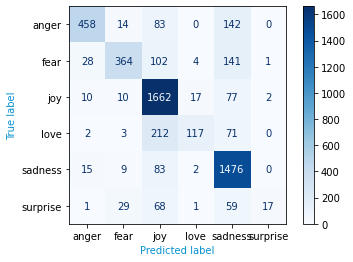

In [55]:
### Lets plot confusion Matrix
plot_confusion_matrix(nv_m, x_test,y_test, cmap='Blues');

## Model_2 Random Forest 

Accuracy score for Random Forest is:  88.27651515151516 %

Classification Report
              precision    recall  f1-score   support

       anger       0.87      0.89      0.88       697
        fear       0.85      0.84      0.84       640
         joy       0.91      0.90      0.91      1778
        love       0.82      0.79      0.81       405
     sadness       0.90      0.91      0.90      1585
    surprise       0.76      0.77      0.77       175

    accuracy                           0.88      5280
   macro avg       0.85      0.85      0.85      5280
weighted avg       0.88      0.88      0.88      5280

CPU times: user 2min 21s, sys: 339 ms, total: 2min 22s
Wall time: 2min 22s


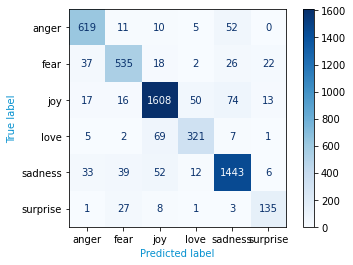

In [56]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# fit the SVC model based on the given training data
prob = rf.fit(x_train, y_train).predict_proba(x_test)

# perform classification and prediction on samples in x_test
y_pred_rf = rf.predict(x_test)

print("Accuracy score for Random Forest is: ", accuracy_score(y_test, y_pred_rf) * 100, '%')
print()
print('Classification Report')
print(classification_report(y_test,y_pred_rf))

### Lets plot confusion Matrix
plot_confusion_matrix(rf, x_test,y_test, cmap='Blues');

## Model_3 Logistic Regressor

In [57]:
'''%%time

from sklearn.linear_model import LogisticRegression
# classify using support vector classifier
lr = LogisticRegression()

# fit the model based on the given training data
prob = lr.fit(x_train, y_train).predict_proba(x_test)

# perform classification and prediction on samples in x_test
y_pred_lr = lr.predict(x_test)

print("Accuracy score for LogisticRegression is: ", accuracy_score(y_test, y_pred_lr) * 100, '%')
print()
print('Classification Report')
print(classification_report(y_test,y_pred_lr))

### Lets plot confusion Matrix
plot_confusion_matrix(lr, x_test,y_test, cmap='Blues');''';

[Solution to decode str error](https://stackoverflow.com/questions/28583565/str-object-has-no-attribute-decode-python-3-error)

## Model_4 SVM

Accuracy score for SVC is:  88.16287878787878 %

Classification Report
              precision    recall  f1-score   support

       anger       0.86      0.89      0.88       697
        fear       0.83      0.86      0.84       640
         joy       0.90      0.91      0.90      1778
        love       0.79      0.81      0.80       405
     sadness       0.93      0.89      0.91      1585
    surprise       0.79      0.71      0.75       175

    accuracy                           0.88      5280
   macro avg       0.85      0.84      0.85      5280
weighted avg       0.88      0.88      0.88      5280

CPU times: user 3h 41min 15s, sys: 5.02 s, total: 3h 41min 20s
Wall time: 3h 41min 29s


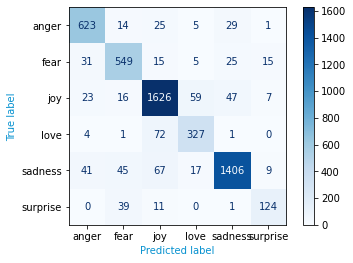

In [58]:
%%time

from sklearn import svm
# classify using support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)

# fit the SVC model based on the given training data
prob = svm.fit(x_train, y_train).predict_proba(x_test)

# perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(x_test)

print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')
print()
print('Classification Report')
print(classification_report(y_test,y_pred_svm))

### Lets plot confusion Matrix
plot_confusion_matrix(svm, x_test,y_test, cmap='Blues');

# Model Interpretation
    1. Eli5
    2. Limp
    3. Shap

In [59]:
import eli5

In [60]:
### Show weight for each Class/label
eli5.show_weights(rf,top=10)        ### NOTE: estimator MultinomialNB() is not supported

Weight,Feature
0.0062 ± 0.0022,x418
0.0055 ± 0.0018,x14451
0.0052 ± 0.0027,x12846
0.0052 ± 0.0022,x13154
0.0050 ± 0.0018,x12558
0.0048 ± 0.0024,x6495
0.0048 ± 0.0022,x6880
0.0047 ± 0.0023,x9025
0.0045 ± 0.0021,x11635
0.0045 ± 0.0022,x4839


# Input Raw/Custome data
### How to impliment this
1. Vecorize input text
2. Apply our model

In [61]:
### Rough code
sample = ['Chai sutta nicotine is turu love']  ### Input value
vect = cv.transform(sample).toarray()          ### Vectorized input value
nv_m.predict(vect)                             ### Predicting the emotion

array(['joy'], dtype='<U8')

In [62]:
### display all the classes in model
nv_m.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'], dtype='<U8')

In [63]:
## Checking for Prediction Probability (i.e percentage/Confidence Score)

nv_m.predict_proba(vect)

array([[0.16690882, 0.06382518, 0.34265631, 0.14255319, 0.26364486,
        0.02041164]])

In [64]:
np.max(nv_m.predict_proba(vect))

0.3426563123941017

seems working fine to me

For sample model is predicting with 36% confidence

## Define a function to perform above task

In [65]:
def predict_emotion_raw(sample):
    vect = cv.transform(sample).toarray()          ### Vectorized input value
    prediction= nv_m.predict(vect)                 ### Predicting the emotion
    return prediction

In [66]:
d= ["Ram is a good Boy"]
predict_emotion_raw(d)

array(['joy'], dtype='<U8')

In [67]:
#### ~~~~~~~~~~ Little Advance Fuction ~~~~~~~~~~ 
def predict_emotion_raw(sample, model):            ### When dealing with multiple models
    vect = cv.transform(sample).toarray()          ### Vectorized input value
    prediction= model.predict(vect)                ### Predicting the emotion
    pred_prob = model.predict_proba(vect)
    pred_percent= dict(zip(model.classes_,pred_prob[0]))
    print(prediction)
    return pred_percent

In [68]:
d= ["It is gonna rain today"]
print('Model=Naive')
display(predict_emotion_raw(d, nv_m))
print()
print('Model= Random Forest')
display(predict_emotion_raw(d, rf))

Model=Naive
['sadness']


{'anger': 0.03161776716319569,
 'fear': 0.053042157019844285,
 'joy': 0.4115645418436874,
 'love': 0.01770231972712911,
 'sadness': 0.47928794580993417,
 'surprise': 0.006785268436208855}


Model= Random Forest
['joy']


{'anger': 0.25,
 'fear': 0.1,
 'joy': 0.46,
 'love': 0.0,
 'sadness': 0.19,
 'surprise': 0.0}

In [69]:
d= ["today is such a beautiful dat"]
print('Model=Naive')
display(predict_emotion_raw(d, nv_m))
print()
print('Model= Random Forest')
display(predict_emotion_raw(d, rf))

Model=Naive
['joy']


{'anger': 0.06976576887948592,
 'fear': 0.05851973746937125,
 'joy': 0.5594743846408492,
 'love': 0.03661951978037851,
 'sadness': 0.2643916305151241,
 'surprise': 0.011228958714789846}


Model= Random Forest
['joy']


{'anger': 0.28,
 'fear': 0.1,
 'joy': 0.47,
 'love': 0.01,
 'sadness': 0.14,
 'surprise': 0.0}

In [70]:
d= ["I am afraid of coffee"]
print('Model=Naive')
display(predict_emotion_raw(d, nv_m))
print()
print('Model= Random Forest')
display(predict_emotion_raw(d, rf))

Model=Naive
['fear']


{'anger': 0.08455632044093042,
 'fear': 0.4900111108298074,
 'joy': 0.23065986127328497,
 'love': 0.022489817413038907,
 'sadness': 0.16623028740586224,
 'surprise': 0.006052602637077388}


Model= Random Forest
['fear']


{'anger': 0.04,
 'fear': 0.75,
 'joy': 0.04,
 'love': 0.0,
 'sadness': 0.17,
 'surprise': 0.0}

In [71]:
d= ["I am fadeup with the beauty of nature how it keeps distracting me"]
print('Model=Naive')
display(predict_emotion_raw(d, nv_m))
print()
print('Model= Random Forest')
display(predict_emotion_raw(d, rf))

Model=Naive
['joy']


{'anger': 0.10209226557170153,
 'fear': 0.12796645721231642,
 'joy': 0.5802778597746859,
 'love': 0.04581744620453951,
 'sadness': 0.12036248602111504,
 'surprise': 0.023483485215640587}


Model= Random Forest
['anger']


{'anger': 0.44,
 'fear': 0.07,
 'joy': 0.24,
 'love': 0.02,
 'sadness': 0.22,
 'surprise': 0.01}

# Lets save this model

In [72]:
import joblib

In [73]:
model_file = open('Emotion_classifier.pkl', 'wb')
joblib.dump(nv_m, model_file)
model_file.close

<function BufferedWriter.close>